<a href="https://colab.research.google.com/github/Mihan552/ToothCheck/blob/master/ToothCheck_Caries_Detection.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
# Импорты для новой версии TensorFlow

# 🔧 ОСНОВНЫЕ БИБЛИОТЕКИ ДЛЯ НЕЙРОСЕТЕЙ:
import tensorflow as tf  # Главная библиотека для машинного обучения
from tensorflow.keras.preprocessing.image import ImageDataGenerator  # Для аугментации и загрузки изображений
from tensorflow.keras.models import Sequential  # Последовательная модель нейросети
from tensorflow.keras.layers import Conv2D, MaxPooling2D  # Сверточные и пулинговые слои
from tensorflow.keras.layers import Activation, Dropout, Flatten, Dense  # Активации, регуляризация, полносвязные слои
from tensorflow.keras import backend as K  # Бэкенд для низкоуровневых операций

# 📊 БИБЛИОТЕКИ ДЛЯ ДАННЫХ И ВИЗУАЛИЗАЦИИ:
import matplotlib.pyplot as plt  # Для графиков и отображения изображений
import os  # Для работы с файловой системой
import numpy as np  # Для численных операций с массивами
from PIL import Image as image  # Для работы с изображениями
import pandas as pd  # Для работы с таблицами данных
import cv2  # OpenCV для обработки изображений

# 🔍 ПРОВЕРКА ОКРУЖЕНИЯ:
print("TensorFlow version:", tf.__version__)  # Проверяем версию TensorFlow
print("GPU доступен:", tf.config.list_physical_devices('GPU'))  # Проверяем доступность GPU для ускорения обучения

TensorFlow version: 2.19.0
GPU доступен: []


In [2]:
# 📎 ПРИВЯЗЫВАЕМ GOOGLE DRIVE ДЛЯ СОХРАНЕНИЯ ФАЙЛОВ

from google.colab import drive
drive.mount('/content/drive')  # Монтируем Google Drive

# Теперь создаем папки ВНУТРИ твоего Google Drive:
!mkdir -p "/content/drive/MyDrive/Colab Notebooks/ToothCheck/dataset/caries"
!mkdir -p "/content/drive/MyDrive/Colab Notebooks/ToothCheck/dataset/healthy"


print("✅ Папки созданы в Google Drive!")
print("Путь: /content/drive/MyDrive/Colab Notebooks/ToothCheck/dataset/")

# Проверяем:
!ls -la "/content/drive/MyDrive/Colab Notebooks/ToothCheck/dataset/"

Mounted at /content/drive
✅ Папки созданы в Google Drive!
Путь: /content/drive/MyDrive/Colab Notebooks/ToothCheck/dataset/
total 12
drwx------ 2 root root 4096 Nov  9 19:17 caries
drwx------ 2 root root 4096 Nov  9 19:17 healthy
drwx------ 2 root root 4096 Nov  9 19:17 test


In [3]:
# 📸 ЗАГРУЗКА ФОТО С КАРИЕСОМ

from google.colab import files
import os
import shutil

print("=== 📷 ЗАГРУЗКА ФОТО С КАРИЕСОМ (10 фото) ===")
uploaded_caries = files.upload()  # Загрузи 10 фото с кариесом

# Перемещаем загруженные фото в папку caries
for filename in uploaded_caries.keys():
    # Копируем файл в папку caries в Google Drive
    shutil.move(filename, f"/content/drive/MyDrive/Colab Notebooks/ToothCheck/dataset/caries/{filename}")
    print(f"✅ {filename} → /dataset/caries/")

print(f"\n📁 Загружено фото с кариесом: {len(os.listdir('/content/drive/MyDrive/Colab Notebooks/ToothCheck/dataset/caries'))}")

=== 📷 ЗАГРУЗКА ФОТО С КАРИЕСОМ (10 фото) ===


Saving 1.png to 1.png
Saving 2.jpg to 2.jpg
Saving 3.PNG to 3.PNG
Saving 4.PNG to 4.PNG
Saving 5.PNG to 5.PNG
Saving 6.PNG to 6.PNG
Saving 7.PNG to 7.PNG
Saving 8.PNG to 8.PNG
Saving 9.PNG to 9.PNG
Saving 10.PNG to 10.PNG
✅ 1.png → /dataset/caries/
✅ 2.jpg → /dataset/caries/
✅ 3.PNG → /dataset/caries/
✅ 4.PNG → /dataset/caries/
✅ 5.PNG → /dataset/caries/
✅ 6.PNG → /dataset/caries/
✅ 7.PNG → /dataset/caries/
✅ 8.PNG → /dataset/caries/
✅ 9.PNG → /dataset/caries/
✅ 10.PNG → /dataset/caries/

📁 Загружено фото с кариесом: 10


In [4]:
# 🦷 ЗАГРУЗКА ЗДОРОВЫХ ЗУБОВ

print("=== 🦷 ЗАГРУЗКА ЗДОРОВЫХ ЗУБОВ (10 фото) ===")
uploaded_healthy = files.upload()  # Загрузи 10 фото здоровых зубов

# Перемещаем загруженные фото в папку healthy
for filename in uploaded_healthy.keys():
    shutil.move(filename, f"/content/drive/MyDrive/Colab Notebooks/ToothCheck/dataset/healthy/{filename}")
    print(f"✅ {filename} → /dataset/healthy/")

print(f"\n📁 Загружено здоровых зубов: {len(os.listdir('/content/drive/MyDrive/Colab Notebooks/ToothCheck/dataset/healthy'))}")

=== 🦷 ЗАГРУЗКА ЗДОРОВЫХ ЗУБОВ (10 фото) ===


Saving 1.jpg to 1.jpg
Saving 2.PNG to 2.PNG
Saving 3.png to 3.png
Saving 4.PNG to 4.PNG
Saving 5.png to 5.png
Saving 6.PNG to 6.PNG
Saving 7.PNG to 7.PNG
Saving 8.PNG to 8.PNG
Saving 9.PNG to 9.PNG
Saving 10.PNG to 10.PNG
✅ 1.jpg → /dataset/healthy/
✅ 2.PNG → /dataset/healthy/
✅ 3.png → /dataset/healthy/
✅ 4.PNG → /dataset/healthy/
✅ 5.png → /dataset/healthy/
✅ 6.PNG → /dataset/healthy/
✅ 7.PNG → /dataset/healthy/
✅ 8.PNG → /dataset/healthy/
✅ 9.PNG → /dataset/healthy/
✅ 10.PNG → /dataset/healthy/

📁 Загружено здоровых зубов: 10


=== 📊 СТАТИСТИКА ДАТАСЕТА ===
📁 Фото с кариесом: 10
📁 Здоровые зубы: 10


/tmp/ipython-input-899281259.py:32: UserWarning: Glyph 129463 (\N{TOOTH}) missing from font(s) DejaVu Sans.
  plt.tight_layout()
/tmp/ipython-input-899281259.py:32: UserWarning: Glyph 9989 (\N{WHITE HEAVY CHECK MARK}) missing from font(s) DejaVu Sans.
  plt.tight_layout()
/usr/local/lib/python3.12/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 129463 (\N{TOOTH}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)
/usr/local/lib/python3.12/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 9989 (\N{WHITE HEAVY CHECK MARK}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)


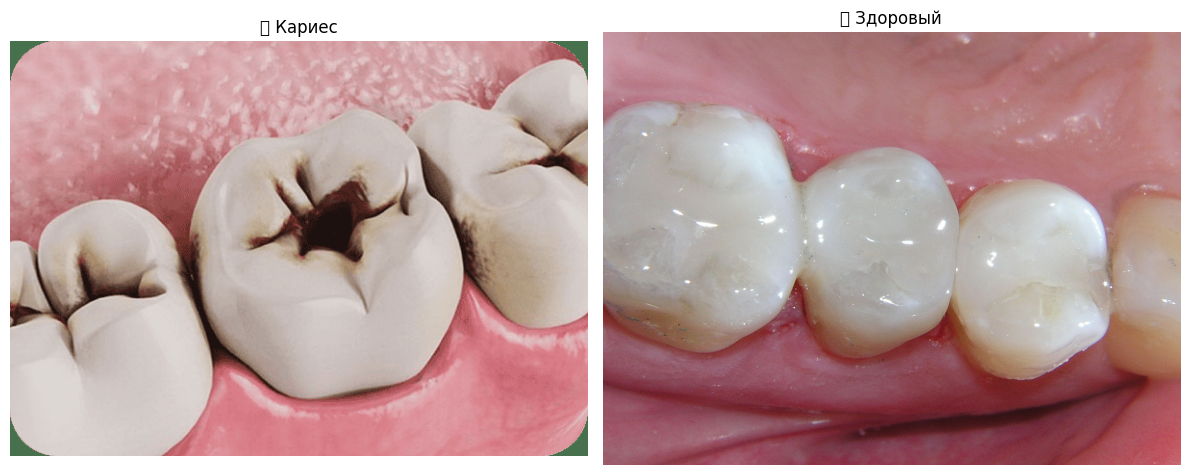

In [6]:
# 📊 Проверка датасета

print("=== 📊 СТАТИСТИКА ДАТАСЕТА ===")
print(f"📁 Фото с кариесом: {len(os.listdir('/content/drive/MyDrive/Colab Notebooks/ToothCheck/dataset/caries'))}")
print(f"📁 Здоровые зубы: {len(os.listdir('/content/drive/MyDrive/Colab Notebooks/ToothCheck/dataset/healthy'))}")

# Показываем ТОЛЬКО 2 фото (без пустых графиков)
import matplotlib.pyplot as plt
import cv2

def show_sample_images():
    fig, axes = plt.subplots(1, 2, figsize=(12, 5))  # ← Только 1x2 = 2 графика

    # Пример кариеса (первое фото)
    caries_files = os.listdir('/content/drive/MyDrive/Colab Notebooks/ToothCheck/dataset/caries')
    if caries_files:
        img = cv2.imread(f'/content/drive/MyDrive/Colab Notebooks/ToothCheck/dataset/caries/{caries_files[0]}')
        img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
        axes[0].imshow(img)
        axes[0].set_title('🦷 Кариес')
        axes[0].axis('off')

    # Пример здорового зуба (первое фото)
    healthy_files = os.listdir('/content/drive/MyDrive/Colab Notebooks/ToothCheck/dataset/healthy')
    if healthy_files:
        img = cv2.imread(f'/content/drive/MyDrive/Colab Notebooks/ToothCheck/dataset/healthy/{healthy_files[0]}')
        img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
        axes[1].imshow(img)
        axes[1].set_title('✅ Здоровый')
        axes[1].axis('off')

    plt.tight_layout()
    plt.show()

show_sample_images()

In [32]:
# 🧠 СОЗДАНИЕ НЕЙРОСЕТИ ДЛЯ ОБНАРУЖЕНИЯ КАРИЕСА

print("=== 🧠 СОЗДАНИЕ НЕЙРОСЕТИ ДЛЯ ОБНАРУЖЕНИЯ КАРИЕСА ===")

# Параметры
image_width, image_height = 100, 100  # размер
epochs = 20  # меньше эпох для начала
lot_size = 8  # уменьшили batch_size

print(f"📐 Размер входных данных: {image_width}x{image_height}")

# Создаем модель с правильным Input слоем
from tensorflow.keras.layers import Input

model = Sequential()

# 🔧 ПРАВИЛЬНЫЙ ПЕРВЫЙ СЛОЙ:
model.add(Input(shape=(image_width, image_height, 3)))  # ← Явно указываем Input

# 🔍 1-Й СЛОЙ: ОБНАРУЖЕНИЕ ПРОСТЫХ ПРИЗНАКОВ
model.add(Conv2D(32, (3, 3)))
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))

# 🔍 2-Й СЛОЙ: ОБНАРУЖЕНИЕ СЛОЖНЫХ ПРИЗНАКОВ
model.add(Conv2D(32, (3, 3)))
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))

# 🔍 3-Й СЛОЙ: ОБНАРУЖЕНИЕ ОЧЕНЬ СЛОЖНЫХ ПРИЗНАКОВ
model.add(Conv2D(64, (3, 3)))
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))

print("✅ Сверточные слои созданы!")

=== 🧠 СОЗДАНИЕ НЕЙРОСЕТИ ДЛЯ ОБНАРУЖЕНИЯ КАРИЕСА ===
📐 Размер входных данных: 100x100
✅ Сверточные слои созданы!


In [33]:
# 🧩 ДОБАВЛЯЕМ ПОЛНОСВЯЗНЫЕ СЛОИ

print("=== 🧩 ДОБАВЛЯЕМ ПОЛНОСВЯЗНЫЕ СЛОИ ===")

# 🔄 ПРЕОБРАЗОВАНИЕ 2D → 1D
model.add(Flatten())
print("✅ Преобразовали 2D-изображение в 1D-вектор")

# 🧠 СЛОЙ ОБЫЧНЫХ НЕЙРОНОВ
model.add(Dense(64))
model.add(Activation('relu'))
print("✅ Добавили слой из 64 нейронов")

# 🛡️ ЗАЩИТА ОТ ПЕРЕОБУЧЕНИЯ
model.add(Dropout(0.5))
print("✅ Добавили защиту от переобучения (Dropout 50%)")

# 🎯 ВЫХОДНОЙ СЛОЙ - РЕЗУЛЬТАТ
model.add(Dense(2))  # 2 нейрона: [кариес, здоровый]
model.add(Activation('softmax'))
print("✅ Добавили выходной слой: 2 класса - кариес/здоровый")

# 📊 ИТОГИ АРХИТЕКТУРЫ
print("\n=== 📊 АРХИТЕКТУРА НЕЙРОСЕТИ ГОТОВА ===")
model.summary()

=== 🧩 ДОБАВЛЯЕМ ПОЛНОСВЯЗНЫЕ СЛОИ ===
✅ Преобразовали 2D-изображение в 1D-вектор
✅ Добавили слой из 64 нейронов
✅ Добавили защиту от переобучения (Dropout 50%)
✅ Добавили выходной слой: 2 класса - кариес/здоровый

=== 📊 АРХИТЕКТУРА НЕЙРОСЕТИ ГОТОВА ===


Model: "sequential_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d_3 (Conv2D)               │ (None, 98, 98, 32)     │           896 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ activation_5 (Activation)       │ (None, 98, 98, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_3 (MaxPooling2D)  │ (None, 49, 49, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_4 (Conv2D)               │ (None, 47, 47, 32)     │         9,248 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ activation_6 (Activation)       │ (None, 47, 47, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_4 (MaxPooling2D)  │ (None, 23, 23, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_5 (Conv2D)               │ (None, 21, 21, 64)     │        18,496 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ activation_7 (Activation)       │ (None, 21, 21, 64)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_5 (MaxPooling2D)  │ (None, 10, 10, 64)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten_1 (Flatten)             │ (None, 6400)           │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_2 (Dense)                 │ (None, 64)             │       409,664 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ activation_8 (Activation)       │ (None, 64)             │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_1 (Dropout)             │ (None, 64)             │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_3 (Dense)                 │ (None, 2)              │           130 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ activation_9 (Activation)       │ (None, 2)              │             0 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 438,434 (1.67 MB)

 Trainable params: 438,434 (1.67 MB)

 Non-trainable params: 0 (0.00 B)

In [34]:
# ⚙️ КОМПИЛЯЦИЯ МОДЕЛИ

print("=== ⚙️ КОМПИЛЯЦИЯ МОДЕЛИ ===")

model.compile(
    loss='categorical_crossentropy',
    optimizer='rmsprop',
    metrics=['accuracy']
)

print("✅ Модель скомпилирована!")

=== ⚙️ КОМПИЛЯЦИЯ МОДЕЛИ ===
✅ Модель скомпилирована!


In [35]:
# 🔄 ПЕРЕСОЗДАЕМ ГЕНЕРАТОРЫ ДАННЫХ

print("=== 🔄 ПЕРЕСОЗДАНИЕ ГЕНЕРАТОРОВ ДАННЫХ ===")

# Загружаем данные заново
train_generator = train_datagen.flow_from_directory(
    train_data_dir,
    target_size=(image_width, image_height),
    batch_size=lot_size,
    class_mode='categorical',
    subset='training',
    classes=['caries', 'healthy']  # Явно указываем классы
)

validation_generator = test_datagen.flow_from_directory(
    validation_data_dir,
    target_size=(image_width, image_height),
    batch_size=lot_size,
    class_mode='categorical',
    subset='validation',
    classes=['caries', 'healthy']  # Явно указываем классы
)

print("✅ Генераторы пересозданы!")
print(f"🎯 Классы: {train_generator.class_indices}")
print(f"📊 Размер тренировочных данных: {len(train_generator)} батчей")
print(f"📊 Размер валидационных данных: {len(validation_generator)} батчей")

=== 🔄 ПЕРЕСОЗДАНИЕ ГЕНЕРАТОРОВ ДАННЫХ ===
Found 16 images belonging to 2 classes.
Found 4 images belonging to 2 classes.
✅ Генераторы пересозданы!
🎯 Классы: {'caries': 0, 'healthy': 1}
📊 Размер тренировочных данных: 2 батчей
📊 Размер валидационных данных: 1 батчей


In [36]:
# 🏃‍♂️ ЗАПУСК ОБУЧЕНИЯ

print("=== 🏃‍♂️ ЗАПУСК ОБУЧЕНИЯ ===")
print("🦷 Нейросеть учится отличать кариес от здоровых зубов...")
print("⏳ Это займет несколько минут...")

# Запускаем обучение!
history = model.fit(
    train_generator,
    steps_per_epoch=len(train_generator),
    epochs=epochs,
    validation_data=validation_generator,
    validation_steps=len(validation_generator),
    verbose=1
)

print("✅ Обучение завершено!")

=== 🏃‍♂️ ЗАПУСК ОБУЧЕНИЯ ===
🦷 Нейросеть учится отличать кариес от здоровых зубов...
⏳ Это займет несколько минут...
Epoch 1/20
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 99ms/step - accuracy: 0.5938 - loss: 0.6706

/usr/local/lib/python3.12/dist-packages/PIL/Image.py:1047: UserWarning: Palette images with Transparency expressed in bytes should be converted to RGBA images
  warnings.warn(


2/2 ━━━━━━━━━━━━━━━━━━━━ 3s 707ms/step - accuracy: 0.5833 - loss: 0.6701 - val_accuracy: 0.2500 - val_loss: 0.6936
Epoch 2/20
2/2 ━━━━━━━━━━━━━━━━━━━━ 1s 354ms/step - accuracy: 0.3333 - loss: 1.4572 - val_accuracy: 0.5000 - val_loss: 0.6987
Epoch 3/20
2/2 ━━━━━━━━━━━━━━━━━━━━ 1s 324ms/step - accuracy: 0.6250 - loss: 0.7722 - val_accuracy: 0.5000 - val_loss: 0.6983
Epoch 4/20
2/2 ━━━━━━━━━━━━━━━━━━━━ 1s 368ms/step - accuracy: 0.7083 - loss: 0.6594 - val_accuracy: 0.2500 - val_loss: 0.6992
Epoch 5/20
2/2 ━━━━━━━━━━━━━━━━━━━━ 1s 314ms/step - accuracy: 0.5833 - loss: 0.6707 - val_accuracy: 0.5000 - val_loss: 0.7027
Epoch 6/20
2/2 ━━━━━━━━━━━━━━━━━━━━ 1s 355ms/step - accuracy: 0.5417 - loss: 0.7118 - val_accuracy: 0.5000 - val_loss: 0.7157
Epoch 7/20
2/2 ━━━━━━━━━━━━━━━━━━━━ 1s 372ms/step - accuracy: 0.4167 - loss: 0.6942 - val_accuracy: 0.5000 - val_loss: 0.7173
Epoch 8/20
2/2 ━━━━━━━━━━━━━━━━━━━━ 1s 312ms/step - accuracy: 0.5000 - loss: 0.7066 - val_accuracy: 0.5000 - val_loss: 0.7011
Epo

=== 📊 ГРАФИКИ ОБУЧЕНИЯ ===


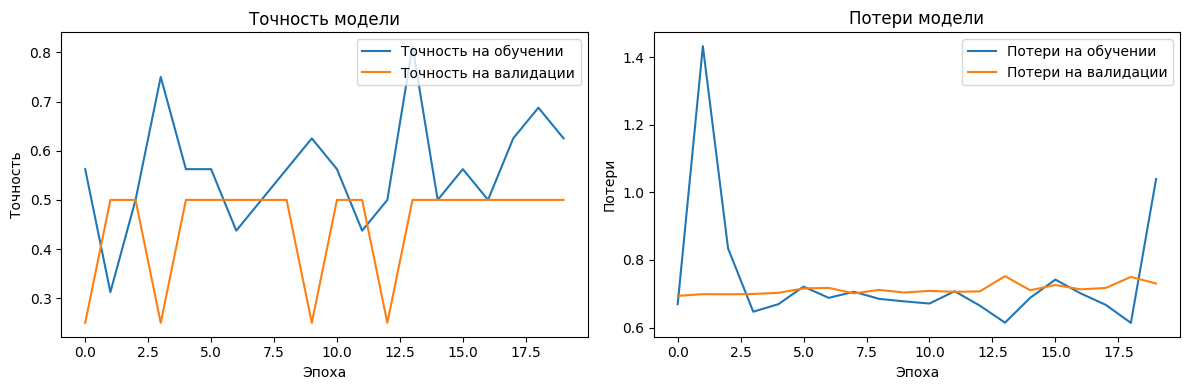

✅ Точность на последней эпохе:
   🎯 Обучение: 62.50%
   🎯 Валидация: 50.00%


In [37]:
# 📊 ВИЗУАЛИЗАЦИЯ РЕЗУЛЬТАТОВ ОБУЧЕНИЯ

print("=== 📊 ГРАФИКИ ОБУЧЕНИЯ ===")

# График точности
plt.figure(figsize=(12, 4))

plt.subplot(1, 2, 1)
plt.plot(history.history['accuracy'], label='Точность на обучении')
plt.plot(history.history['val_accuracy'], label='Точность на валидации')
plt.title('Точность модели')
plt.ylabel('Точность')
plt.xlabel('Эпоха')
plt.legend()

# График потерь
plt.subplot(1, 2, 2)
plt.plot(history.history['loss'], label='Потери на обучении')
plt.plot(history.history['val_loss'], label='Потери на валидации')
plt.title('Потери модели')
plt.ylabel('Потери')
plt.xlabel('Эпоха')
plt.legend()

plt.tight_layout()
plt.show()

print("✅ Точность на последней эпохе:")
print(f"   🎯 Обучение: {history.history['accuracy'][-1]:.2%}")
print(f"   🎯 Валидация: {history.history['val_accuracy'][-1]:.2%}")

In [39]:
# 💾 СОХРАНЕНИЕ МОДЕЛИ И ВЕСОВ

print("=== 💾 СОХРАНЕНИЕ МОДЕЛИ ===")

# Сохраняем модель в современном формате
model.save('/content/drive/MyDrive/Colab Notebooks/ToothCheck/caries_model.keras')
print("✅ Модель сохранена: caries_model.keras")

# Сохраняем веса с правильным расширением
model.save_weights('/content/drive/MyDrive/Colab Notebooks/ToothCheck/model_weights.weights.h5')
print("✅ Веса сохранены: model_weights.weights.h5")

print("🎯 Все файлы сохранены в Google Drive!")

=== 💾 СОХРАНЕНИЕ МОДЕЛИ ===
✅ Модель сохранена: caries_model.keras
✅ Веса сохранены: model_weights.weights.h5
🎯 Все файлы сохранены в Google Drive!


=== 🧪 ТЕСТИРОВАНИЕ МОДЕЛИ ===
📸 Загрузи тестовое фото зуба для проверки:


Saving 2.jpg to 2.jpg
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 56ms/step
🎯 РЕЗУЛЬТАТ: ЗДОРОВЫЙ
📊 УВЕРЕННОСТЬ: 53.09%


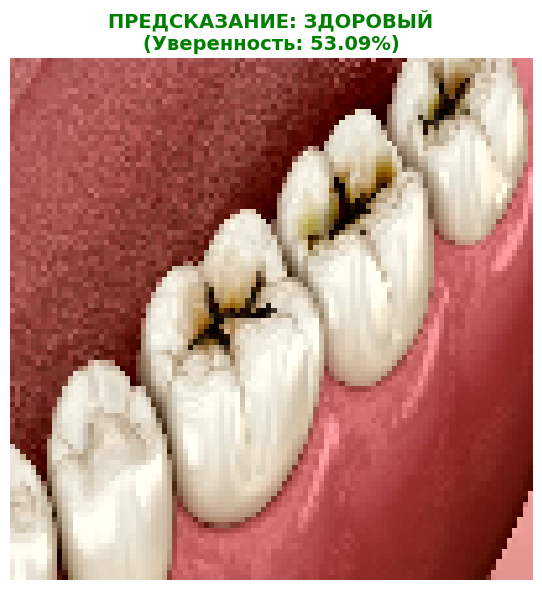


🔍 СРАВНЕНИЕ С АЛГОРИТМОМ OpenCV:
   🤖 Нейросеть: здоровый
   📊 Уверенность нейросети: 53.09%


In [43]:
# 🧪 ТЕСТИРОВАНИЕ МОДЕЛИ НА НОВЫХ ФОТО

print("=== 🧪 ТЕСТИРОВАНИЕ МОДЕЛИ ===")

from google.colab import files
import numpy as np
from tensorflow.keras.preprocessing import image

# Загружаем тестовое фото
print("📸 Загрузи тестовое фото зуба для проверки:")
uploaded_test = files.upload()

if uploaded_test:
    # Обрабатываем первое загруженное фото
    test_filename = list(uploaded_test.keys())[0]

    # Загружаем и подготавливаем изображение
    img = image.load_img(test_filename, target_size=(100, 100))
    img_array = image.img_to_array(img)
    img_array = np.expand_dims(img_array, axis=0)
    img_array /= 255.0  # Нормализуем как при обучении

    # Предсказываем
    prediction = model.predict(img_array)
    class_names = ['кариес', 'здоровый']
    result_index = np.argmax(prediction[0])
    confidence = prediction[0][result_index]

    print(f"🎯 РЕЗУЛЬТАТ: {class_names[result_index].upper()}")
    print(f"📊 УВЕРЕННОСТЬ: {confidence:.2%}")

    # Цвет результата
    color = 'red' if result_index == 0 else 'green'

    # Показываем фото с результатом
    plt.figure(figsize=(8, 6))
    plt.imshow(img)
    plt.title(f"ПРЕДСКАЗАНИЕ: {class_names[result_index].upper()}\n(Уверенность: {confidence:.2%})",
              color=color, fontsize=14, fontweight='bold')
    plt.axis('off')
    plt.tight_layout()
    plt.show()

    # Сравниваем с твоим алгоритмом OpenCV
    print("\n🔍 СРАВНЕНИЕ С АЛГОРИТМОМ OpenCV:")
    print("   🤖 Нейросеть:", class_names[result_index])
    print("   📊 Уверенность нейросети:", f"{confidence:.2%}")
else:
    print("❌ Фото не загружено")